# Introduction to Deep Learning

In this subject and the next one, we will learn about deep learning which is a type of machine learning. In this unit, we will start by discussing the basic vocabulary for deep learning such as neural network, artificial neurons, network architecture and learn about the recent role of GPUs in training these deep learning models.

### Deep learning

Let's start by defining what a neural network is. Neural networks are machine learning models that have a graph structure inspired by the brain with interconnected units called artificial neurons. There are many different types of neural network architecture. You can take a look at this video which shows different architectures trained to recognize digits from the MNIST database. https://www.youtube.com/watch?v=3JQ3hYko51Y


These networks typically have a large number of neurons and interconnections which makes them computationally expensive to train and use. However, due to recent advances in parallel computing, it's now possible to train them a lot faster using graphical processing units (GPUs), designed initially to render intensive graphical tasks like video games. **Also, we can now build larger and in particular deeper networks that can perform more complex tasks than traditional machine learning methods**. Deep learning refers to these recent deep architectures of neural networks.

### Why GPUs

Deep learning models are usually organized into successive layers of neurons. The output of each layer is fed into the next one and so on which creates **a chain of hidden layers** between the input and the network output. With this type of architecture, the network learns simple features in the first layers that are then combined into more complex ones in the next layers and so on. For instance, if the task is to build a network that recognizes faces, the first layers will detect simple features like lines and curves, and the next ones will try to combine them into more complex objects and higher-level concepts like eyes, nose, mouth and so on.

This ability to automatically **learn features from raw input makes them particularly powerful but also slower to train since each layer adds new parameters to train**. For instance, the AlexNet network, which is famous for being the first deep learning model to beat more traditional approaches in the ImageNet challenge in 2012 (http://www.image-net.org/challenges/LSVRC/2012/results.html), had a total of 650 thousand neurons and 60 million parameters. To train the model, the authors were able to parallelize repetitive operations (matrix and vector operations) using two GPUs.

### Summary

Let's summarize. Deep learning is a type of machine learning model. Deep learning models can typically solve more complex tasks but at the cost of having a larger number of parameters to tune. However, it's usually possible to accelerate the training process using the parallel computations capabilities of GPUs.

In the next units,**we will see how to create, train and use neural networks with the TensorFlow library**. In this subject, we will start by implementing the neural network equivalent to a linear regression and then the one equivalent to logistic regression. We will use our network to classify images from the MNIST database. In the next subject, we will then add layers to our networks and try to classify images from the CIFAR-10 data set. Finally, we will learn about convolutional neural networks (CNN) and test a simple one with a few layers

# Setting up TensorFlow

In this course, we will use TensorFlow (TF) to build and train our deep learning models. Deep learning is a fast-growing area of machine learning. One of the advantages of using TensorFlow is that it's developed, maintained and used internally by Google which means that it's also frequently updated with the latest models and improvements. It's also very popular. Hence, you can easily find support online.

### Different APIs

There are several ways to develop neural networks in TensorFlow

>- Via the low-level graph API
>- High-level Keras API

In the next units, we will start by introducing computation graphs which is an important underlying principle behind TensorFlow and show how to use the low-level graph API to design simple neural networks.

Later in the course, we will also learn about the Keras API which simplifies a lot of the network design and training process.

# Computation graphs

The goal of this unit is to get familiar with the TensorFlow library and the idea of computation graphs. We will take the brain and body weights data that we saw in the previous course and use TensorFlow to create, fit and use a linear regression model. This will give us a good overview of the library and the tools needed to build neural networks.

You can download the data set from the resource section.

### Brain and body weights

In [1]:
import pandas as pd

# Load data
data_df = pd.read_csv('brain-body-weights.csv')

# First five rows
data_df.head()

,body,brain,mammal
0,1.6,-2.0,Lesser short-tailed shrew
1,2.3,-1.4,Little brown bat
2,3.1,-1.2,Big brown bat
3,3.1,-0.9,Mouse
4,3.9,-1.1,Musk shrew


We saw in the previous course that there is a linear relationship between the **logarithm of the brain and body weights.** For this reason, the brain and body columns in the DataFrame from above contain the logarithm of the original weights. Let's plot the data.

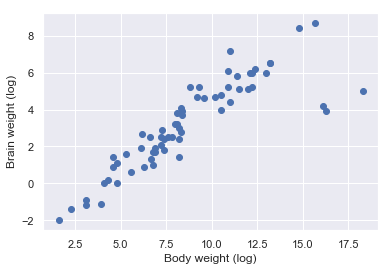

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Activate Seaborn
sns.set()

# Plot data
plt.scatter(data_df.body, data_df.brain)
plt.xlabel('Body weight (log)')
plt.ylabel('Brain weight (log)')
plt.show()

We can see in the plot that there are three clear outliers. For this example, we will keep them in the data and train our network using Huber loss.

### TensorFlow computation graphs

In TensorFlow, we define our model using **computation graphs** that specify how the different elements in our model interact with each other. In our example, we want to implement a linear regression model.

> ^y=ax+b

In this equation, a and b are the slope and intercept parameters, x is the input data and ^y the predictions that we will then use to compare to the output data y using Huber loss. We can represent our model as a sequence of computation steps that modify the data.

In [3]:
from IPython.display import Image
Image(url='https://d7whxh71cqykp.cloudfront.net/uploads/image/data/2781/computation-graph.svg')

Each node in this graph is a step in our computation. For instance, the * node multiplies the input data x by a, or the loss node compares the target values y and the predictions ^y using Huber loss. This is the idea behind computation graphs. We first define a graph and then feed data that "flows" through the graph. In the TensorFlow jargon, data values are called **tensors**.

Let's see how to define our linear regression graph from above with TensorFlow.

### Variables



In [4]:
import tensorflow as tf

We can now create the 
a
 and 
b
 parameters with the Variable object.

In [5]:
# Slope and intercept parameters
a = tf.Variable(initial_value=0, dtype=tf.float32)
b = tf.Variable(initial_value=0, dtype=tf.float32)

We need to **specify an initial value**. In our case, we can initialize the two parameters to zero. **TensorFlow assigns a data type** to each variable (and to every tensor in general). By default, it's the data type of the initial value. In our case, 0 is an integer value but both variables should be floating point numbers. Hence, we need to specify the data type by setting dtype=tf.float32.

### Placeholders

Now that we have a node for each parameter, let's create the nodes for the input and output variables. Again, the idea behind computation graphs is to start by defining a graph of operations and then run the graph by injecting data. For this reason, instead of "connecting" the graph to our data_df variable from above, we create placeholder nodes that represent the data to be fed. **We can create them with the placeholder() function.**

In [6]:
# Create a placeholder for input/target data
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

In [7]:
# Compute predictions
y_hat = a*x + b

### Loss function
Let's define the loss function. TensorFlow provides a set of operations similar to Numpy to work with tensors. For instance, we can define the mean squared error (MSE) using the square() and reduce_mean() functions.

In [8]:
# Mean squared error (MSE)
loss = tf.reduce_mean( # Equivalent to np.mean()
    tf.square( # Equivalent to np.square()
        y - y_hat # Implements broadcasting like Numpy
    )
)

Note that TensorFlow implements a few loss functions in its losses module. You can take a look at this page to see the different possibilities. https://www.tensorflow.org/api_docs/python/tf/losses

For instance, we will use the Huber loss one for our network.

In [9]:
# Huber loss
loss = tf.losses.huber_loss(y, y_hat, delta=1.0)

### Optimizer

To train our model, we need to define an optimizer. You can take a look at this page which lists the different optimizers available in TensorFlow. https://www.tensorflow.org/api_docs/python/tf/train

Let's use the simple gradient descent strategy.

In [10]:
# Create the optimizer
gd = tf.train.GradientDescentOptimizer(
    learning_rate=0.1)

In this code, we create a GradientDescentOptimizer and set its learning rate to 0.1. Note that we can also use a placeholder for the learning rate.

In [11]:
# Learning rate placeholder
lr = tf.placeholder(dtype=tf.float32)

# Create the optimizer
gd = tf.train.GradientDescentOptimizer(
    learning_rate=lr)

In this case, we will need to provide a learning rate value when "running" the graph.

Once we have the optimizer, we can add a new node to our graph that computes the gradients and applies them to the variables. We create this training operation node by calling the minimize() function with the **tensor that we want to minimize**. In our case this tensor is the loss term.

In [12]:
# Create a training operation
train_op = gd.minimize(loss)

### TensorFlow sessions

We can now evaluate the nodes in our graph and get their values using a **sessio**n. A session is a TensorFlow object that encapsulates the environment in which all tfoperations are executed and tensors are evaluated. We usually manage the resources in our session using a *with* statement

In [13]:
# Initialization operation
initialization_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Evaluate node "a"
    result = sess.run(a)
    print(result)
    # Prints: 0.0

0.0


In this code, we create a new Session object in a with statement and use it to evaluate the slope a
with its run() function. Note that we need to create and run an **initialization operation** before using the session. We can get this special operation with the global_variables_initializer() function. We won't go into the details of variable initialization for now, but you can take a look at this guide if you want to learn more about it.

### Feed data

In the example from above, we can evaluate the value of node a because it doesn't depend on any placeholder. For instance, we would get an error if we try to evaluate ^y without setting x.


**If you get this kind of error, make sure that all relevant placeholders are set and fed into the tf.Session.** To inject data into the x and y placeholders, we can use the feed_dict argument of the run() function which expects a dictionary of (tensor, values) pairs.

In [15]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Compute predictions
    result = sess.run(y_hat, feed_dict={
        x: data_df.body # Feed body weights
    })
    print(result)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In this code, we inject the body weights data_df.body into the x placeholder and evaluate the y_hat node. The values that we get back from sess.run() are the values of y_hat after executing the TensorFlow Graph. In this case, we store those values in a variable called result. We get only zero values because we initialized the a and b variables to zero.

### Training

To learn the a and b parameters, we need to run the training operation node train_op. The operation depends on the x, y and the lr placeholders.

In [16]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Run the training operation, get loss value
    result = sess.run([train_op, loss], feed_dict={
        x: data_df.body, # Body weights
        y: data_df.brain, # Brain weights
        lr: 0.1 # Learning rate
    })
    print(result)

[None, 2.9202309]


This time, we pass a list of operations (train_op is the gradient descent) and tensors (loss is the loss value) to the run() function. Operations will only return a None value, while tensors will return their value after the graph was executed. The operation train_op will therefore give back None as a value, while the loss node will return 2.9202311, which is the loss value after running the training operation.

Let's see if these loss values decrease after each training operation by running train_op a hundred times.

In [17]:
# Monitor the a/b and loss values
loss_values = []
a_values = []
b_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Run 100 times the training operation
    for _ in range(100):
        # Run training op and collect a/b and loss values
        _, loss_val, a_val, b_val = sess.run(
            [train_op, loss, a, b],
            feed_dict={
                x: data_df.body, # Body weight
                y: data_df.brain, # Brain weight
                lr: 0.1 # Learning rate
        })

        # Save values
        loss_values.append(loss_val)
        a_values.append(a_val)
        b_values.append(b_val)

In this code, we run train_op a hundred times using a for loop that iterates over the list of digits between 0 and 99 generated with the range() function. At each iteration, we save the loss and parameter values into the loss_values, a_values and b_values lists. Note that we use the "throwaway" variable _ to discard unused results.

Let's plot the loss and parameter values.

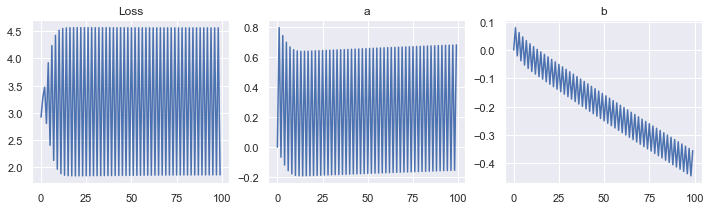

In [18]:
# Create figure with a subplot for each list of values
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3))

# Plot loss values
ax1.set_title('Loss')
ax1.plot(loss_values)

# Plot slope values
ax2.set_title('a')
ax2.plot(a_values)

# Plot intercept values
ax3.set_title('b')
ax3.plot(b_values)

plt.show()

As we can see, the loss value oscillates between 4.5 and 2 which means that gradient descent is having issues learning the a and b values.

We saw in the last course that the algorithm is sensitive to the scale of the input data. Let's try to **standardize the body weights**. Instead of modifying our data, let's add a standardization operation in our graph that standardizes the values in x using the mean and standard deviation statistics of the body weights in data_df.

In [20]:
import numpy as np

# Compute mean and std of input variable
print('Mean:', np.mean(data_df.body)) 
print('Std:', np.std(data_df.body))

Mean: 8.643076923076922
Std: 3.538620732204927


We can now add an x_standardized node using these two statistics.

In [21]:
# Standardized input x
x_standardized = (x - 8.643) / 3.539

# Redefine graph (code from above)
# ----------------
# Compute predictions
y_hat = a*x_standardized + b

# Huber loss
loss = tf.losses.huber_loss(y, y_hat)

# Learning rate placeholder
lr = tf.placeholder(dtype=tf.float32)

# Create the optimizer
gd = tf.train.GradientDescentOptimizer(learning_rate=lr)

# Create a training operation
train_op = gd.minimize(loss)

It's important to understand that x_standardized is a new node in our computation graph. Hence, we need to "rewire" the entire graph and create all the other nodes again.

Let's rerun gradient descent with the code from above:

In [22]:
# Monitor the a/b and loss values
loss_values = []
a_values = []
b_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Run 100 times the training operation
    for _ in range(100):
        # Run training op and collect a/b and loss values
        _, loss_val, a_val, b_val = sess.run(
            [train_op, loss, a, b],
            feed_dict={
                x: data_df.body, # Body weight
                y: data_df.brain, # Brain weight
                lr: 0.1 # Learning rate
        })

        # Save values
        loss_values.append(loss_val)
        a_values.append(a_val)
        b_values.append(b_val)

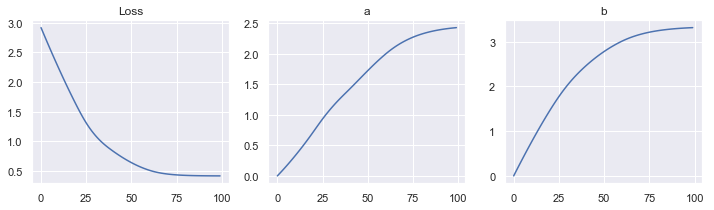

In [23]:
# Create figure with a subplot for each list of values
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 3))

# Plot loss values
ax1.set_title('Loss')
ax1.plot(loss_values)

# Plot slope values
ax2.set_title('a')
ax2.plot(a_values)

# Plot intercept values
ax3.set_title('b')
ax3.plot(b_values)

plt.show()

This time, the loss value keeps decreasing after each iteration and the 
a
 and 
b
 parameters seem to stabilize after a hundred iterations.
 
### Prediction
Finally, let's see how to use our network to predict brain weights. We will compute the predictions for a hundred sample body weights between the minimum and the maximum body weight values.

In [24]:
import numpy as np

# Create a hundred sample body weights
x_values = np.linspace(
    data_df.body.min(), # Between the minimum
    data_df.body.max(), # and maximum body weight values
    num=100
)

We can now inject this sample input data into our graph. Since we use a with statement to create the session, TensorFlow automatically releases the resources and forgets the value of the a and b variables, once the code was executed. This means the optimized a and b values from the previous session above are only stored in the last position of our a_values and b_valueslist. Using the feed_dict, we can set these values and use them as tensor values in our graph.

In [25]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Compute predictions
    y_values = sess.run(y_hat, feed_dict={
        x: x_values, # Sample body weights
        a: a_values[-1], # last slope value
        b: b_values[-1] # last intercept value
    })

We pass the last slope and intercept values from the a_values and b_values lists and save the predictions in a y_values variable. Note that we don't need to provide a learning rate value lr since we are not running the training operation train_op.

Let's plot the predictions with Seaborn.

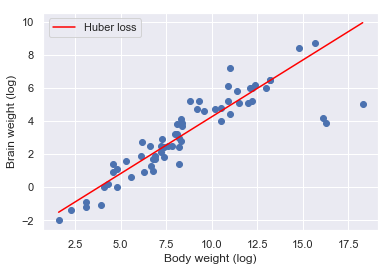

In [26]:
# Get a few colors from default color palette
blue, green, red = sns.color_palette()[:3]

# Plot data with sample predictions
plt.scatter(data_df.body, data_df.brain, label=None)
plt.plot(x_values, y_values, label='Huber loss', color='red')
plt.xlabel('Body weight (log)')
plt.ylabel('Brain weight (log)')
plt.legend()
plt.show()

We plot the data points from the data_df DataFrame and the predictions from the x_values and y_values variables.

Thanks to Huber loss, our linear regression ignores the three outliers and the line fits well the data points.

### Summary
In this unit, we learned about computation graphs and saw the basic tools to create and evaluate them with TensorFlow.

In the next unit, we will use these tools to implement a softmax regression network and train it to recognize images from the MNIST database.


Q&A : 
 The computation graph in TensorFlow 1 requires that you define all the computations/operations between the tensors (i.e. between the variables in TensorFlow which are of types tf.Variable or tf.placeholders). In our case, x and y are placeholder tensors that we will be fed in with data once the session is executed. Tensor is a special type of data that is similar to Numpy ndarray but does not necessarily work on built-in functions that expect Numpy arrays. For example, sklearn.preprocessing.scale expects an array, matrix, or list. Such a function does not work with TensorFlow tensors. That is why we need to manually define the operations such as
x_standardized = (x - 8.643) / 3.539
or
ax + b. (or tf.add(tf.multiply(a, x), b))